<a href="https://colab.research.google.com/github/AxithChoudhary/BoomBikes_multilinear_model/blob/main/Multi_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE



In [3]:
df=pd.read_csv("/content/drive/MyDrive/Upgrad assignments /Bike multi linear regression/Data/day.csv",index_col="instant")
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
df.shape

(730, 15)

###Plotting Graph

Text(0.5, 1.0, 'ride count vs each day')

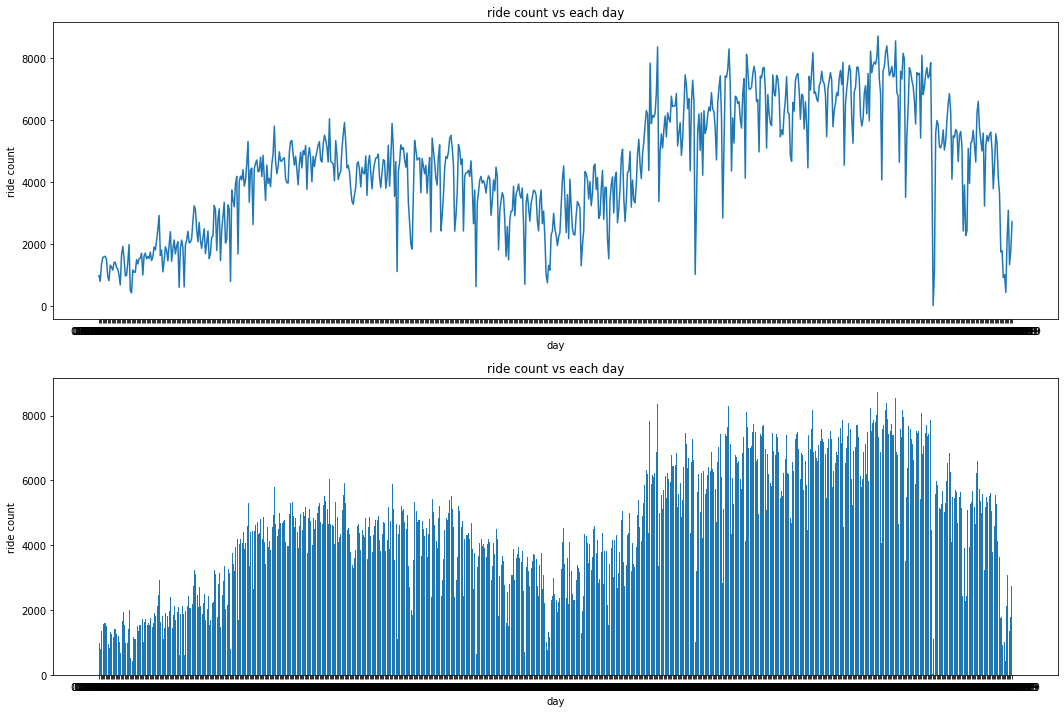

In [8]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
plt.plot(df["dteday"],df["cnt"])
plt.xlabel("day")
plt.ylabel("ride count")
plt.title("ride count vs each day")
plt.subplot(2,1,2)
plt.bar(df["dteday"],df["cnt"])
plt.xlabel("day")
plt.ylabel("ride count")
plt.title("ride count vs each day")

In [9]:
df["dteday"]=df["dteday"].apply(lambda x: int(x.split("-")[0]))
df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


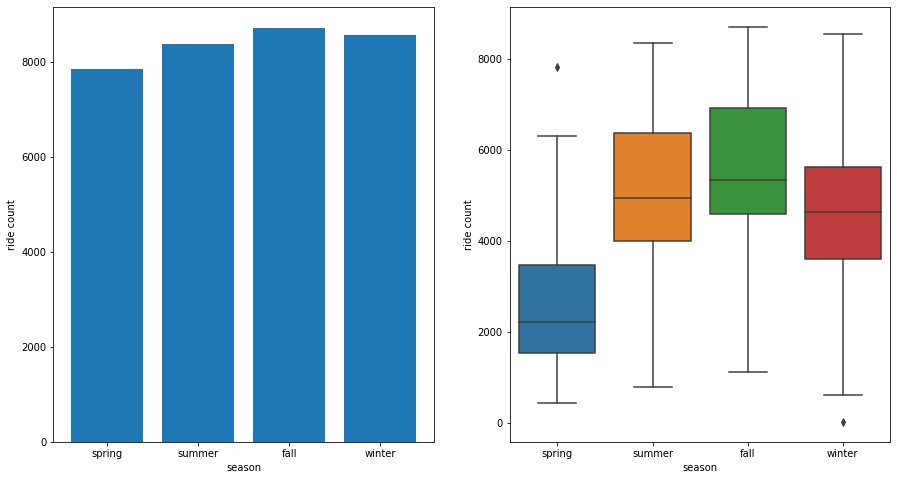

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(df["season"],df["cnt"])
plt.xticks((1,2,3,4),('spring','summer','fall','winter'))
plt.xlabel("season")
plt.ylabel("ride count")
plt.subplot(1,2,2)
sns.boxplot(df["season"],df["cnt"])
plt.xticks((0,1,2,3),('spring','summer','fall','winter'))
plt.xlabel("season")
plt.ylabel("ride count")
plt.show()

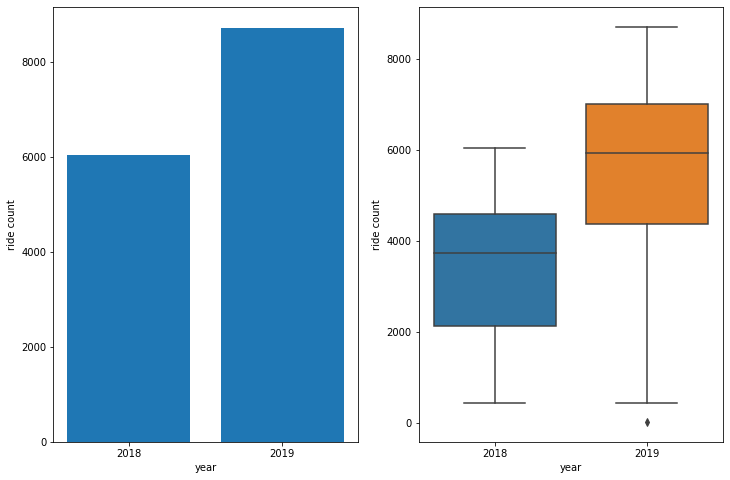

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(df["yr"],df["cnt"])
plt.xticks((0,1),("2018","2019"))
plt.xlabel("year")
plt.ylabel("ride count")
plt.subplot(1,2,2)
sns.boxplot(df["yr"],df["cnt"])
plt.xticks((0,1),("2018","2019"))
plt.xlabel("year")
plt.ylabel("ride count")
plt.show()

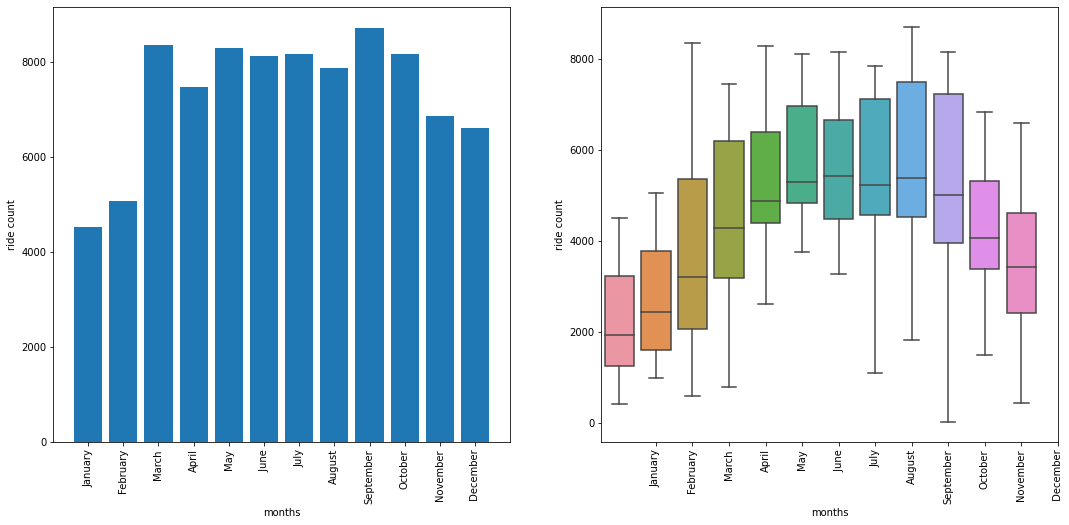

In [12]:

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.bar(df["mnth"],df["cnt"])
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12),("January", "February", "March", "April", "May"," June", "July", "August", "September", "October", "November"," December"),rotation=90)
plt.xlabel("months")
plt.ylabel("ride count")
plt.subplot(1,2,2)
sns.boxplot(df["mnth"],df["cnt"])
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12),("January", "February", "March", "April", "May"," June", "July", "August", "September", "October", "November"," December"),rotation=90)
plt.xlabel("months")
plt.ylabel("ride count")
plt.show()

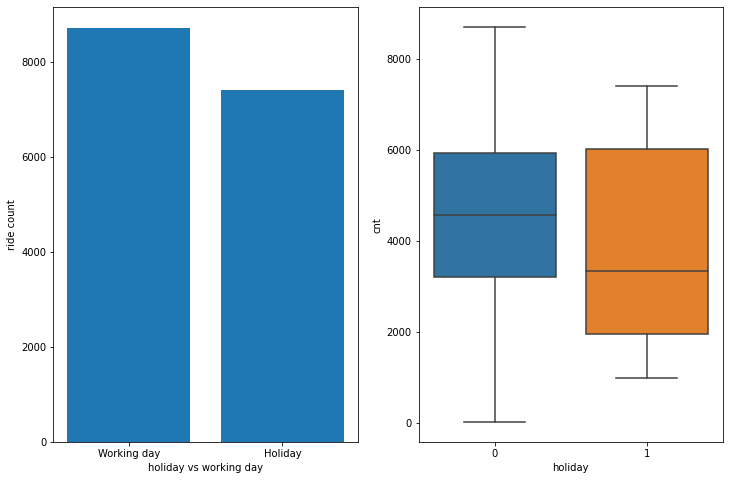

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(df["holiday"],df["cnt"])
plt.xticks((1,0),("Holiday","Working day"))
plt.xlabel("holiday vs working day")
plt.ylabel("ride count")
plt.subplot(1,2,2)
sns.boxplot(df["holiday"],df["cnt"])
plt.show()

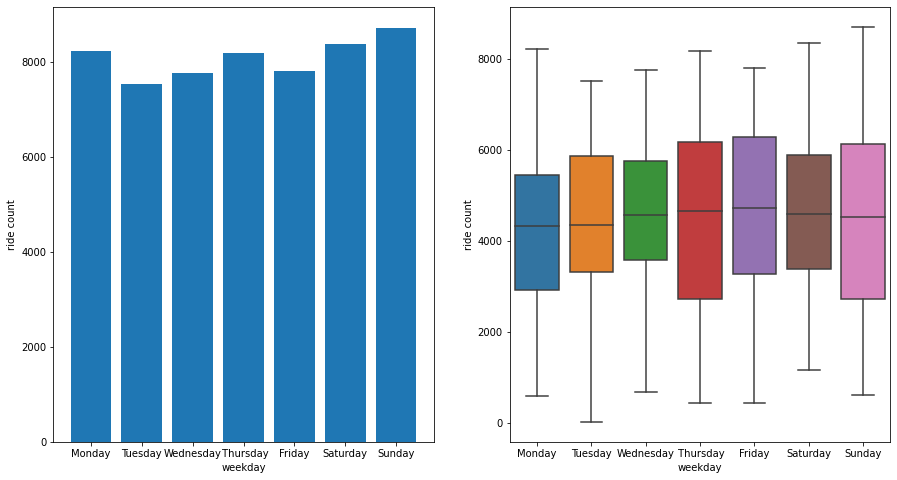

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(df["weekday"],df["cnt"])
plt.xticks((0,1,2,3,4,5,6),("Monday" ,"Tuesday", "Wednesday"," Thursday","Friday","Saturday","Sunday"))
plt.xlabel("weekday")
plt.ylabel("ride count")

plt.subplot(1,2,2)
sns.boxplot(df["weekday"],df["cnt"])
plt.xticks((0,1,2,3,4,5,6),("Monday" ,"Tuesday", "Wednesday"," Thursday","Friday","Saturday","Sunday"))
plt.xlabel("weekday")
plt.ylabel("ride count")
plt.show()

###weathersit
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog




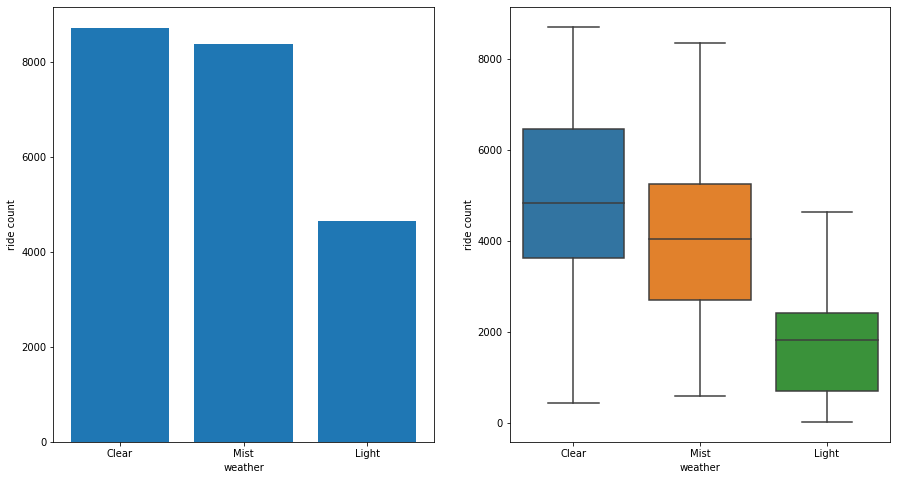

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(df["weathersit"],df["cnt"])
plt.xticks((1,2,3),("Clear","Mist","Light"))
plt.xlabel("weather")
plt.ylabel("ride count")

plt.subplot(1,2,2)
sns.boxplot(df["weathersit"],df["cnt"])
plt.xticks((0,1,2),("Clear","Mist","Light"))
plt.xlabel("weather")
plt.ylabel("ride count")
plt.show()

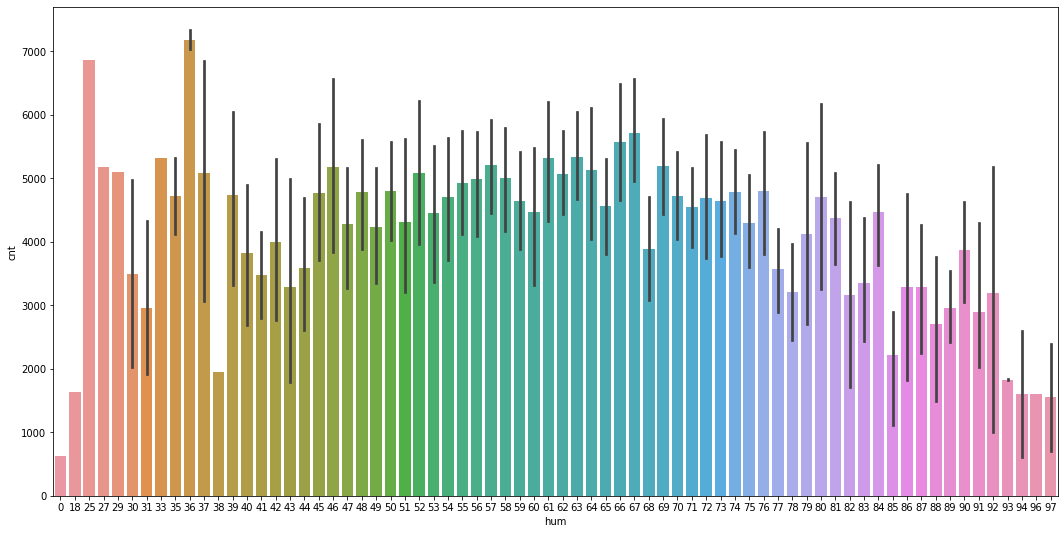

In [16]:
plt.figure(figsize=(18,9))
# plt.bar(df.hum.apply(int),df.cnt)
sns.barplot(data=df,x=df.hum.apply(int),y=df.cnt)
plt.show()

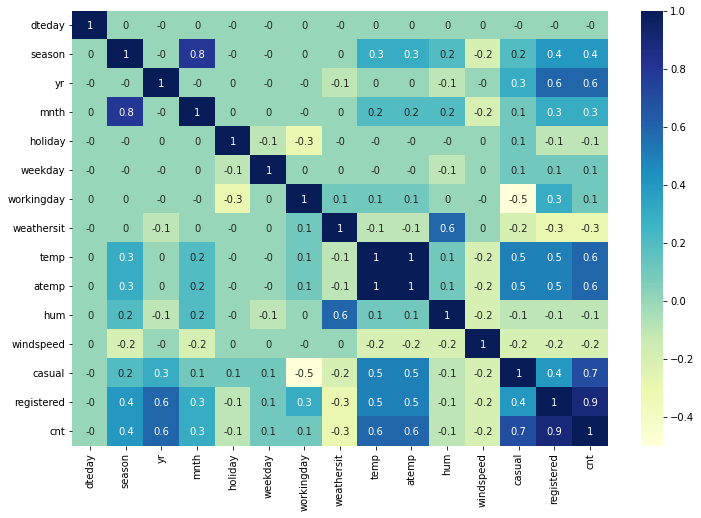

In [17]:
plt.figure(figsize = (12, 8))
sns.heatmap(round(df.corr(),1), annot = True, cmap="YlGnBu")
plt.show()

##Transforming Data

In [18]:
#checking correlation of season and month
correlation=df["season"].corr(df["mnth"])
print(f"the correlation of season and month is {correlation}")
#checking correlation of season and month
correlation=df["atemp"].corr(df["temp"])
print(f"the correlation of atemp and temp is {correlation}")



the correlation of season and month is 0.8310320517390505
the correlation of atemp and temp is 0.9916961786905649


In [19]:
#since atemp and temp are highly correlated therefore removing atemp
#dropping atemp and season
df=df.drop("atemp",axis=1)

In [20]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
# df["weekday"]=df['weekday'].map({0:"Monday" ,1:"Tuesday",2: "Wednesday",3:" Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
df["yr"]=df["yr"].map({0:"2018",1:"2019"})
df["mnth"]=df["mnth"].map({1:"January",2: "February",3: "March",4: "April",5: "May",6:" June", 7:"July",8: "August",9: "September",10: "October",11: "November",12:" December"})
df["weathersit"]=df["weathersit"].map({1:"clear",2:"wind",3:"light",4:"heavy"})

In [21]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,1,spring,2018,January,0,6,0,wind,14.110847,80.5833,10.749882,331,654,985
2,2,spring,2018,January,0,0,0,wind,14.902598,69.6087,16.652113,131,670,801
3,3,spring,2018,January,0,1,1,clear,8.050924,43.7273,16.636703,120,1229,1349
4,4,spring,2018,January,0,2,1,clear,8.200000,59.0435,10.739832,108,1454,1562
5,5,spring,2018,January,0,3,1,clear,9.305237,43.6957,12.522300,82,1518,1600


In [22]:
#Dummy Variables
# dummy=["weekday","season","mnth","weathersit"]
dummy=["season","mnth","weathersit"]
# dummy=["mnth","weathersit"]
dummy_series=pd.get_dummies(df[dummy],drop_first=True)
dummy_series.head()

,season_spring,season_summer,season_winter,mnth_ June,mnth_April,mnth_August,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
df=pd.concat([df,dummy_series],axis=1)

In [24]:
df=df.drop(dummy,axis=1)

In [25]:
df.columns

Index(['dteday', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_ June', 'mnth_April',
       'mnth_August', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_light', 'weathersit_wind'],
      dtype='object')

In [26]:
df.head()

,dteday,yr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,,,,,,
1,1,2018,0,6,0,14.110847,80.5833,10.749882,331,654,...,0,1,0,0,0,0,0,0,0,1
2,2,2018,0,0,0,14.902598,69.6087,16.652113,131,670,...,0,1,0,0,0,0,0,0,0,1
3,3,2018,0,1,1,8.050924,43.7273,16.636703,120,1229,...,0,1,0,0,0,0,0,0,0,0
4,4,2018,0,2,1,8.200000,59.0435,10.739832,108,1454,...,0,1,0,0,0,0,0,0,0,0
5,5,2018,0,3,1,9.305237,43.6957,12.522300,82,1518,...,0,1,0,0,0,0,0,0,0,0


##Splitting the Data into Training and Testing Sets

In [27]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=42)

In [28]:
df_train.shape

(510, 27)

In [29]:
df_test.shape

(220, 27)

In [30]:
df_train.columns

Index(['dteday', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_ June', 'mnth_April',
       'mnth_August', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weathersit_light', 'weathersit_wind'],
      dtype='object')

In [31]:
###changing yr column from object to integer
df_train["yr"]=pd.to_numeric(df_train["yr"]) 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 646 to 103
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dteday            510 non-null    int64  
 1   yr                510 non-null    int64  
 2   holiday           510 non-null    int64  
 3   weekday           510 non-null    int64  
 4   workingday        510 non-null    int64  
 5   temp              510 non-null    float64
 6   hum               510 non-null    float64
 7   windspeed         510 non-null    float64
 8   casual            510 non-null    int64  
 9   registered        510 non-null    int64  
 10  cnt               510 non-null    int64  
 11  season_spring     510 non-null    uint8  
 12  season_summer     510 non-null    uint8  
 13  season_winter     510 non-null    uint8  
 14  mnth_ June        510 non-null    uint8  
 15  mnth_April        510 non-null    uint8  
 16  mnth_August       510 non-null    uint8  


##Rescaling the Features

In [32]:
scaling_col=["dteday","hum","windspeed","cnt","yr"]

In [33]:
scaler=MinMaxScaler()
df_train[scaling_col]=scaler.fit_transform(df_train[scaling_col])
df_train.head()

,dteday,yr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,,,,,,
646,0.233333,1.0,1,1,0,15.716653,0.731215,0.419004,874,4604,...,0,0,0,0,0,0,1,0,0,1
164,0.400000,0.0,0,1,1,26.035000,0.509660,0.708724,863,4157,...,0,0,0,0,0,0,0,0,0,0
361,0.866667,0.0,0,2,1,13.325000,0.785745,0.415925,103,1059,...,0,0,0,0,0,0,0,0,0,1
641,0.066667,1.0,0,3,1,26.957500,0.817947,0.110593,728,6844,...,0,0,0,0,0,0,1,0,0,1
626,0.566667,1.0,0,2,1,25.556653,0.899098,0.839562,371,3702,...,0,0,0,0,0,0,0,1,0,1


In [34]:
df_train.describe()

,dteday,yr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.479739,0.519608,0.027451,2.968627,0.668627,20.564745,0.654203,0.415045,859.656863,3691.545098,...,0.074510,0.088235,0.092157,0.062745,0.092157,0.090196,0.090196,0.090196,0.029412,0.345098
std,0.292471,0.500106,0.163554,2.032882,0.471169,7.477007,0.143788,0.185760,672.943289,1573.664040,...,0.262857,0.283915,0.289531,0.242742,0.289531,0.286744,0.286744,0.286744,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,9.000000,416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.000000,1.000000,0.000000,14.089660,0.544033,0.281934,340.000000,2627.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.466667,1.000000,0.000000,3.000000,1.000000,21.371250,0.660798,0.384737,739.000000,3725.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,1.000000,0.000000,5.000000,1.000000,26.948962,0.756977,0.526489,1094.750000,4798.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,6.000000,1.000000,35.328347,1.000000,1.000000,3252.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


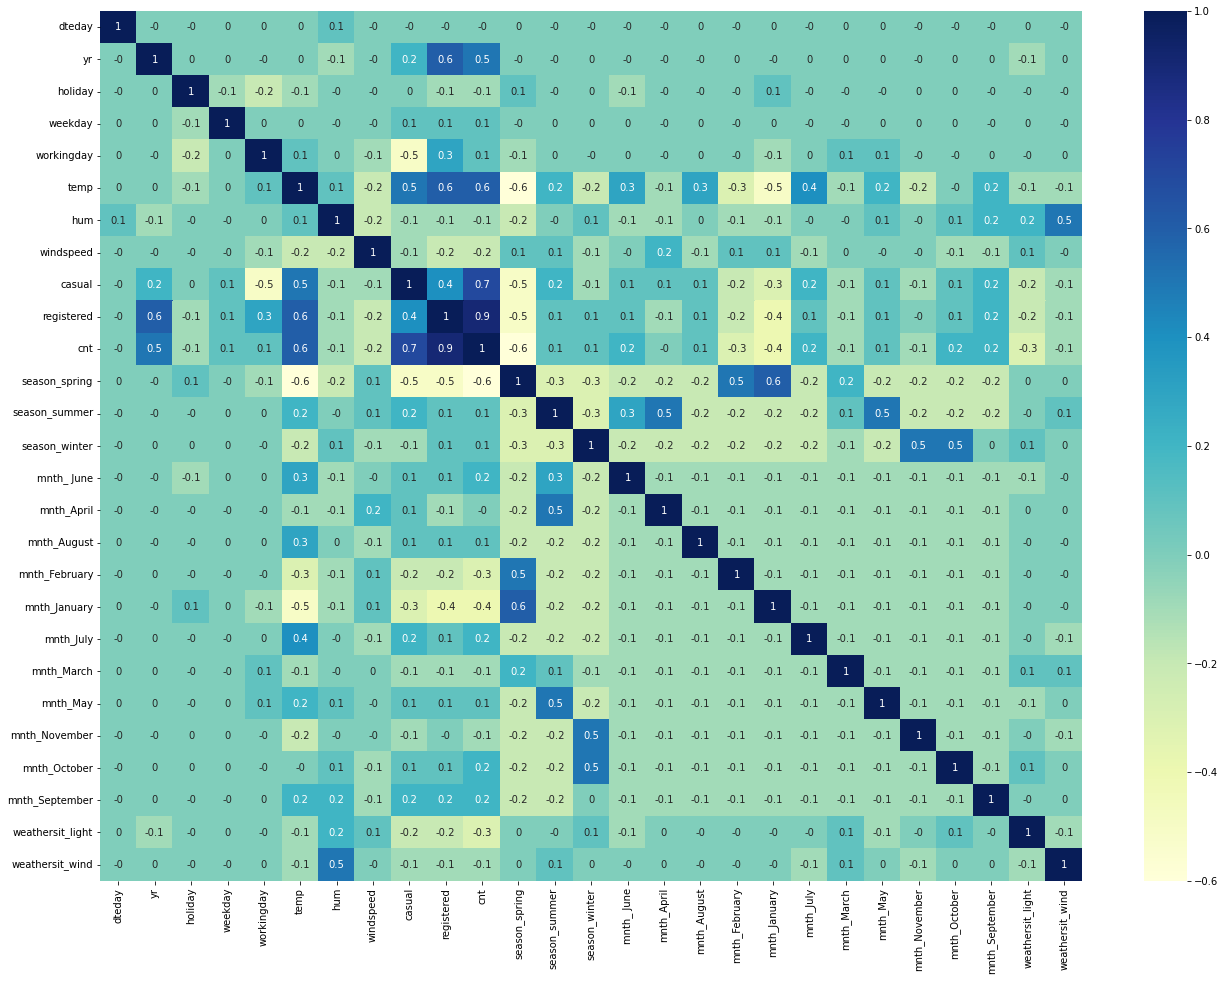

In [35]:
plt.figure(figsize = (22, 16))
sns.heatmap(round(df_train.corr(),1), annot = True, cmap="YlGnBu")
plt.show()

#####Dividing into X and Y sets for the model building

In [36]:
y_train=df_train.pop("cnt")
X_train=df_train

#VIF

In [37]:
def vif_function(df):
  vif=pd.DataFrame()
  vif["feature"]=df.columns
  vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  vif["VIF"]=round(vif["VIF"],2)
  vif=vif.sort_values(by="VIF",ascending=False)
  return vif


##Making model 1


In [38]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)
rfe_data=pd.DataFrame({"column":X_train.columns,"status":rfe.support_,"ranking":rfe.ranking_})
rfe_data.sort_values("ranking")

,column,status,ranking
0,dteday,True,1
14,mnth_April,True,1
13,mnth_ June,True,1
24,weathersit_light,True,1
19,mnth_March,True,1
10,season_spring,True,1
9,registered,True,1
8,casual,True,1
6,hum,True,1
21,mnth_November,True,1


In [39]:
col=X_train.columns[rfe.support_]
print(f"the columns are {col}")
X_train=X_train[col]

the columns are Index(['dteday', 'yr', 'holiday', 'workingday', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'mnth_ June', 'mnth_April', 'mnth_March',
       'mnth_November', 'mnth_September', 'weathersit_light'],
      dtype='object')


In [40]:
X_train.head()

,dteday,yr,holiday,workingday,hum,windspeed,casual,registered,season_spring,mnth_ June,mnth_April,mnth_March,mnth_November,mnth_September,weathersit_light
instant,,,,,,,,,,,,,,,
646,0.233333,1.0,1,0,0.731215,0.419004,874,4604,0,0,0,0,0,0,0
164,0.400000,0.0,0,1,0.509660,0.708724,863,4157,0,1,0,0,0,0,0
361,0.866667,0.0,0,1,0.785745,0.415925,103,1059,1,0,0,0,0,0,0
641,0.066667,1.0,0,1,0.817947,0.110593,728,6844,0,0,0,0,0,0,0
626,0.566667,1.0,0,1,0.899098,0.839562,371,3702,0,0,0,0,0,1,0


In [41]:
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
7         registered  30.36
4                hum  11.69
3         workingday   8.94
6             casual   7.20
5          windspeed   5.49
1                 yr   4.66
0             dteday   3.65
8      season_spring   2.43
10        mnth_April   1.35
13    mnth_September   1.27
14  weathersit_light   1.26
9         mnth_ June   1.24
12     mnth_November   1.22
11        mnth_March   1.19
2            holiday   1.10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.655e+29
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:53:25   Log-Likelihood:                 16546.
No. Observations:                 510   AIC:                        -3.306e+04
Df Residuals:                     494   BIC:                        -3.299e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0520   8.44e-16  -6.16e+13      0.000      -0.052      -0.052
dteday            1.908e-17   3.05e-16      0.063      0.950    -5.8e-16    6.18e-16
yr                1.279e-17   2.81e-16      0.046      0.964   -5.38e-16    5.64e-16
holiday          -5.096e-17   5.64e-16     -0.090      0.928   -1.16e-15    1.06e-15
workingday         1.31e-16   3.26e-16      0.402      0.688   -5.09e-16    7.71e-16
hum               2.168e-18   7.15e-16      0.003      0.998    -1.4e-15    1.41e-15
windspeed        -2.524e-16   5.34e-16     -0.473      0.637    -1.3e-15    7.97e-16
casual               0.0001   2.31e-19   5.22e+14      0.000       0.000       0.000
registered           0.0001   1.36e-19   8.88e+14      0.000       0.000       0.000
season_spring     4.857e-17   3.64e-16      0.134      0.894   -6.66e-16    7.63e-16
mnth_ June       -2.093e-17   3.41e-16     -0.061      0.951   -6.91e-16    6.49e-16
mnth_April        1.353e-16   3.57e-16      0.379      0.705   -5.66e-16    8.37e-16
mnth_March        3.123e-17   3.86e-16      0.081      0.936   -7.27e-16    7.89e-16
mnth_November    -1.605e-17   3.44e-16     -0.047      0.963   -6.91e-16    6.59e-16
mnth_September   -7.444e-17   3.34e-16     -0.223      0.824   -7.31e-16    5.83e-16
weathersit_light   1.57e-16    5.8e-16      0.271      0.787   -9.83e-16     1.3e-15
==============================================================================
Omnibus:                       33.871   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.462
Skew:                          -0.122   Prob(JB):                      0.00119
Kurtosis:                       2.242   Cond. No.                     5.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


#Making model 2
removing registered column since it have very high p value and vif


In [42]:
X_train=X_train.drop("registered",1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
4                hum  10.82
5          windspeed   5.42
6             casual   4.59
3         workingday   4.05
0             dteday   3.65
1                 yr   2.36
7      season_spring   2.04
9         mnth_April   1.30
12    mnth_September   1.25
8         mnth_ June   1.23
11     mnth_November   1.22
10        mnth_March   1.18
13  weathersit_light   1.17
2            holiday   1.10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     277.7
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          6.49e-224
Time:                        18:53:25   Log-Likelihood:                 573.26
No. Observations:                 510   AIC:                            -1117.
Df Residuals:                     495   BIC:                            -1053.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2832      0.030      9.395      0.000       0.224       0.342
dteday              -0.0109      0.012     -0.897      0.370      -0.035       0.013
yr                   0.1844      0.008     24.509      0.000       0.170       0.199
holiday             -0.0091      0.023     -0.406      0.685      -0.053       0.035
workingday           0.1764      0.010     17.121      0.000       0.156       0.197
hum                 -0.1224      0.028     -4.370      0.000      -0.177      -0.067
windspeed           -0.0692      0.021     -3.282      0.001      -0.111      -0.028
casual               0.0002   8.63e-06     22.444      0.000       0.000       0.000
season_spring       -0.1798      0.012    -14.914      0.000      -0.204      -0.156
mnth_ June           0.0063      0.014      0.466      0.641      -0.020       0.033
mnth_April          -0.0842      0.014     -6.128      0.000      -0.111      -0.057
mnth_March          -0.0162      0.015     -1.056      0.292      -0.046       0.014
mnth_November       -0.0356      0.014     -2.615      0.009      -0.062      -0.009
mnth_September       0.0517      0.013      3.934      0.000       0.026       0.078
weathersit_light    -0.1315      0.022     -5.870      0.000      -0.175      -0.087
==============================================================================
Omnibus:                      119.087   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.355
Skew:                          -1.072   Prob(JB):                     2.10e-84
Kurtosis:                       6.680   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Making model 3
removing holiday column since it have very high p value and vif





In [43]:
X_train=X_train.drop("holiday",1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature    VIF
3                hum  10.65
4          windspeed   5.42
5             casual   4.59
2         workingday   3.88
0             dteday   3.65
1                 yr   2.35
6      season_spring   2.03
8         mnth_April   1.30
11    mnth_September   1.25
7         mnth_ June   1.23
10     mnth_November   1.22
9         mnth_March   1.18
12  weathersit_light   1.17


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     299.5
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          3.99e-225
Time:                        18:53:25   Log-Likelihood:                 573.17
No. Observations:                 510   AIC:                            -1118.
Df Residuals:                     496   BIC:                            -1059.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2816      0.030      9.428      0.000       0.223       0.340
dteday              -0.0109      0.012     -0.897      0.370      -0.035       0.013
yr                   0.1843      0.008     24.534      0.000       0.170       0.199
workingday           0.1774      0.010     17.730      0.000       0.158       0.197
hum                 -0.1221      0.028     -4.366      0.000      -0.177      -0.067
windspeed           -0.0686      0.021     -3.265      0.001      -0.110      -0.027
casual               0.0002   8.58e-06     22.602      0.000       0.000       0.000
season_spring       -0.1799      0.012    -14.928      0.000      -0.204      -0.156
mnth_ June           0.0065      0.014      0.475      0.635      -0.020       0.033
mnth_April          -0.0842      0.014     -6.135      0.000      -0.111      -0.057
mnth_March          -0.0160      0.015     -1.045      0.297      -0.046       0.014
mnth_November       -0.0356      0.014     -2.619      0.009      -0.062      -0.009
mnth_September       0.0516      0.013      3.933      0.000       0.026       0.077
weathersit_light    -0.1312      0.022     -5.865      0.000      -0.175      -0.087
==============================================================================
Omnibus:                      120.510   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.390
Skew:                          -1.084   Prob(JB):                     1.69e-85
Kurtosis:                       6.697   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Making model 4
removing registered column since it have very high p value and vif

In [44]:
#since the p-value and VIF of  atemp is very high therefore we will remove it
X_train=X_train.drop('dteday',1)
print(vif_function(X_train))
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

             feature   VIF
2                hum  9.62
3          windspeed  5.37
4             casual  4.55
1         workingday  3.84
0                 yr  2.35
5      season_spring  2.01
7         mnth_April  1.29
10    mnth_September  1.24
6         mnth_ June  1.23
9      mnth_November  1.22
8         mnth_March  1.18
11  weathersit_light  1.17


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     324.6
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          3.24e-226
Time:                        18:53:25   Log-Likelihood:                 572.76
No. Observations:                 510   AIC:                            -1120.
Df Residuals:                     497   BIC:                            -1064.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2776      0.030      9.402      0.000       0.220       0.336
yr                   0.1843      0.008     24.533      0.000       0.169       0.199
workingday           0.1773      0.010     17.726      0.000       0.158       0.197
hum                 -0.1239      0.028     -4.441      0.000      -0.179      -0.069
windspeed           -0.0687      0.021     -3.269      0.001      -0.110      -0.027
casual               0.0002   8.58e-06     22.622      0.000       0.000       0.000
season_spring       -0.1800      0.012    -14.941      0.000      -0.204      -0.156
mnth_ June           0.0064      0.014      0.472      0.637      -0.020       0.033
mnth_April          -0.0841      0.014     -6.132      0.000      -0.111      -0.057
mnth_March          -0.0164      0.015     -1.071      0.285      -0.047       0.014
mnth_November       -0.0354      0.014     -2.604      0.009      -0.062      -0.009
mnth_September       0.0518      0.013      3.943      0.000       0.026       0.078
weathersit_light    -0.1311      0.022     -5.864      0.000      -0.175      -0.087
==============================================================================
Omnibus:                      124.638   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.266
Skew:                          -1.111   Prob(JB):                     2.47e-91
Kurtosis:                       6.834   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#we will build the model with these column values
X_train.columns

Index(['yr', 'workingday', 'hum', 'windspeed', 'casual', 'season_spring',
       'mnth_ June', 'mnth_April', 'mnth_March', 'mnth_November',
       'mnth_September', 'weathersit_light'],
      dtype='object')

In [46]:
X_train.shape

(510, 12)

###we will build the model with these column values
'holiday', 'casual', 'weekday_Saturday', 'weekday_Wednesday',
       'season_summer', 'season_winter', 'mnth_April', 'mnth_August',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_March',
       'mnth_November', 'mnth_October', 'mnth_September', 'weathersit_light'

##Error Distribution

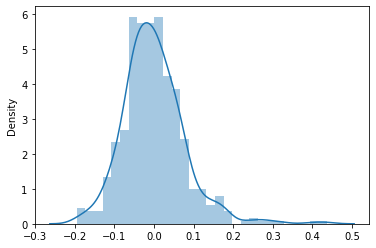

In [47]:
y_pred_val=lr_model.predict(X_train_sm)
residual=y_pred_val-y_train
sns.distplot(residual)
plt.show()

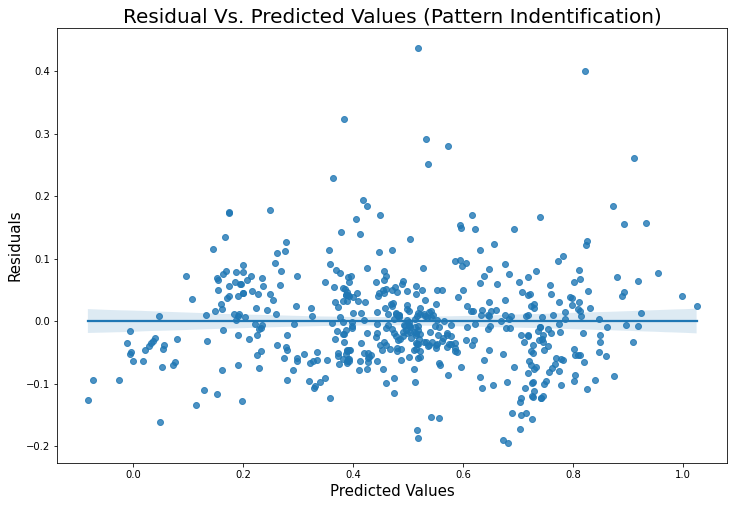

In [48]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_pred_val, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

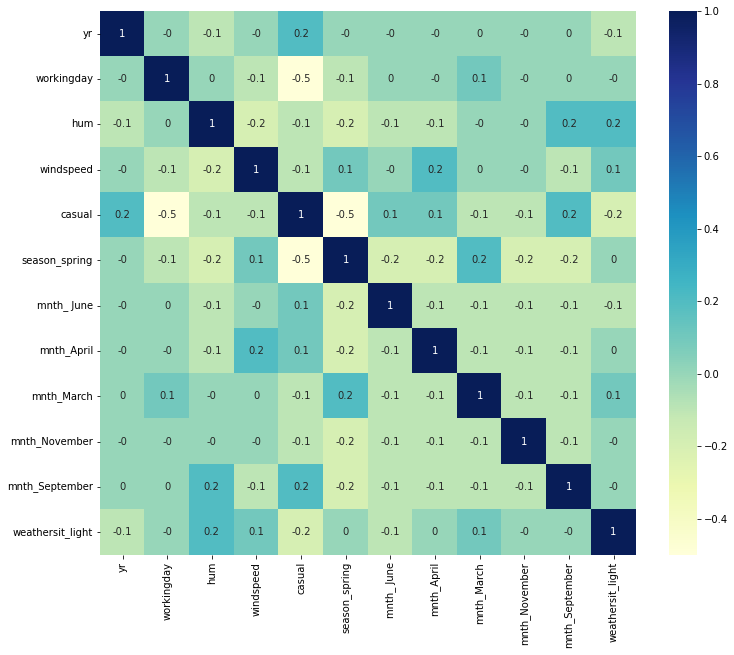

In [58]:
#plotting correlation heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(round(X_train.corr(),1), annot = True, cmap="YlGnBu")
plt.show()

#Making final model 

In [49]:
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     324.6
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          3.24e-226
Time:                        18:53:26   Log-Likelihood:                 572.76
No. Observations:                 510   AIC:                            -1120.
Df Residuals:                     497   BIC:                            -1064.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2776      0.030      9.402      0.000       0.220       0.336
yr                   0.1843      0.008     24.533      0.000       0.169       0.199
workingday           0.1773      0.010     17.726      0.000       0.158       0.197
hum                 -0.1239      0.028     -4.441      0.000      -0.179      -0.069
windspeed           -0.0687      0.021     -3.269      0.001      -0.110      -0.027
casual               0.0002   8.58e-06     22.622      0.000       0.000       0.000
season_spring       -0.1800      0.012    -14.941      0.000      -0.204      -0.156
mnth_ June           0.0064      0.014      0.472      0.637      -0.020       0.033
mnth_April          -0.0841      0.014     -6.132      0.000      -0.111      -0.057
mnth_March          -0.0164      0.015     -1.071      0.285      -0.047       0.014
mnth_November       -0.0354      0.014     -2.604      0.009      -0.062      -0.009
mnth_September       0.0518      0.013      3.943      0.000       0.026       0.078
weathersit_light    -0.1311      0.022     -5.864      0.000      -0.175      -0.087
==============================================================================
Omnibus:                      124.638   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.266
Skew:                          -1.111   Prob(JB):                     2.47e-91
Kurtosis:                       6.834   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
df_test[scaling_col]=scaler.transform(df_test[scaling_col])
df_test.head()

,dteday,yr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,...,mnth_February,mnth_January,mnth_July,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_light,weathersit_wind
instant,,,,,,,,,,,,,,,,,,,,,
469,0.433333,1.0,0,6,0,20.295000,0.518248,0.422104,2795,4665,...,0,0,0,0,0,0,0,0,0,0
149,0.933333,0.0,0,0,0,27.367500,0.843709,0.479765,2355,2433,...,0,0,0,0,1,0,0,0,0,0
303,0.966667,0.0,0,0,0,13.085847,0.642765,0.386287,885,2446,...,0,0,0,0,0,0,1,0,0,0
356,0.700000,0.0,0,4,1,17.356653,0.780592,0.062325,227,2841,...,0,0,0,0,0,0,0,0,0,1
516,1.000000,1.0,0,4,1,27.880000,0.507943,0.433030,1100,6238,...,0,0,0,0,1,0,0,0,0,0


In [51]:
X_test=df_test[X_train.columns]
y_test=df_test["cnt"]

In [52]:
y_test

instant
469    0.848606
149    0.526017
303    0.350115
356    0.318363
516    0.833877
         ...   
533    0.790414
559    0.853314
138    0.413377
315    0.354582
684    0.605336
Name: cnt, Length: 220, dtype: float64

In [53]:
X_test.shape

(220, 12)

In [54]:
X_train.shape

(510, 12)

In [55]:
X_test= sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8793217292224296

Text(0, 0.5, 'y predicted')

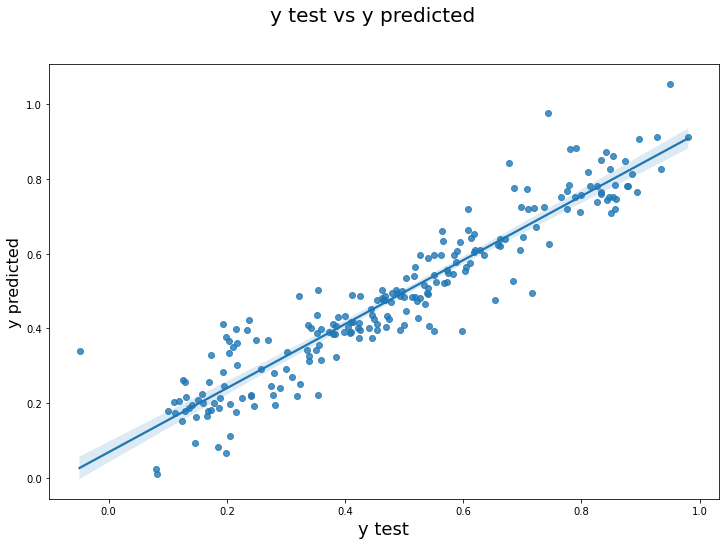

In [57]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(12,8))
sns.regplot(y_test, y_test_pred)
fig.suptitle('y test vs y predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y test', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16)  